# Information

## **Students Information:**


1. Student 1
  * Name = Peyman 
  * Last Name = Naseri
  * Student ID = 4011305965014
2. Student 2
  * Name = Maryam
  * Last Name = HokmAbadi
  * Student ID = 4011305965011




## **Project Information:**
* Course: Applied Data Science
* colab: [link](https://colab.research.google.com/github/peyman886/ADS/blob/main/3_Classification/Classification.ipynb) 
* github: [link](https://github.com/peyman886/ADS/tree/main/3_Classification/Classification.ipynb)

# Required libraries

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

In [2]:
from PIL import Image
from sklearn import datasets, metrics
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split 


from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


# Binary Calssification

## DATA

### load and show data

,X1,X2,Y
0,0.004291,-0.174600,-1
1,2.225050,0.117181,1
2,0.274173,-0.514910,-1
3,-1.045133,-0.798009,1
4,1.611457,0.239339,1


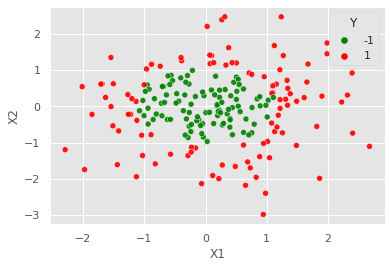

In [3]:
df = pd.read_csv("data.csv")
df = df.drop(columns = ['Unnamed: 0'])
sns.scatterplot(data = df, x='X1', y='X2',hue='Y',alpha=.9, palette=['green', 'red'])
df.head()

### split data into training and test sets

In [4]:
y = df['Y'].to_numpy()
X = df.drop(columns=['Y']).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43, shuffle=True)

print('shape X_train:', X_train.shape)
print('shape X_test:', X_test.shape)
print()
print('shape y_test:', y_test.shape)
print('shape y_train:', y_train.shape)

shape X_train: (160, 2)
shape X_test: (40, 2)

shape y_test: (40,)
shape y_train: (160,)


## Models

In [8]:
def evaluation(predicted,y_test=y_test):
  print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    )
  disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
  disp.figure_.suptitle("Confusion Matrix")
  # print(f"Confusion matrix:\n{disp.confusion_matrix}")
  plt.show()
  print('\n\n\n')
  # .values.argmax(axis=1)

### Classic Models

In [ ]:
def training(model):
  # print(model)
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  evaluation(predicted, y_test)
  

In [ ]:
models = [
    LogisticRegression(),
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf', gamma=1),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(random_state=0, max_depth=3),
    RandomForestClassifier(max_depth=3, random_state=0),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),n_estimators=100)
]

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

          -1       0.43      0.24      0.31        25
           1       0.27      0.47      0.34        15

    accuracy                           0.33        40
   macro avg       0.35      0.35      0.32        40
weighted avg       0.37      0.33      0.32        40




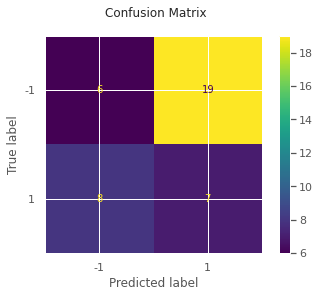





Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

          -1       0.62      0.60      0.61        25
           1       0.38      0.40      0.39        15

    accuracy                           0.53        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.53      0.53      0.53        40




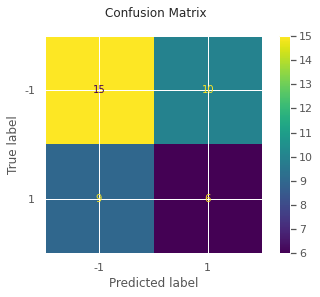





Classification report for classifier SVC(gamma=1):
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98        25
           1       1.00      0.93      0.97        15

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40




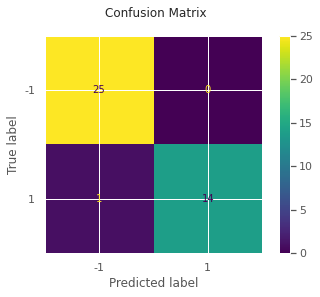





Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96        25
           1       0.93      0.93      0.93        15

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40




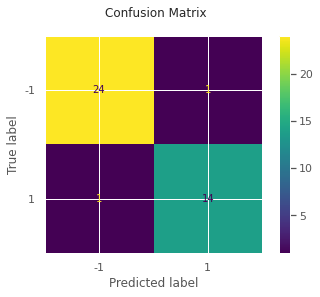





Classification report for classifier DecisionTreeClassifier(max_depth=3, random_state=0):
              precision    recall  f1-score   support

          -1       0.83      0.96      0.89        25
           1       0.91      0.67      0.77        15

    accuracy                           0.85        40
   macro avg       0.87      0.81      0.83        40
weighted avg       0.86      0.85      0.84        40




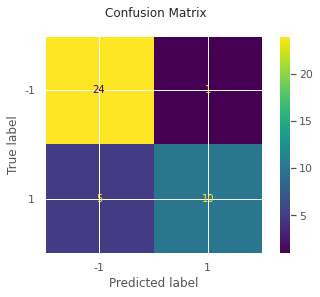





Classification report for classifier RandomForestClassifier(max_depth=3, random_state=0):
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96        25
           1       0.93      0.93      0.93        15

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40




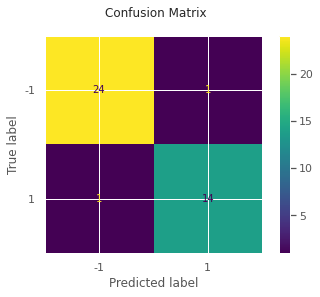





Classification report for classifier AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100):
              precision    recall  f1-score   support

          -1       1.00      0.92      0.96        25
           1       0.88      1.00      0.94        15

    accuracy                           0.95        40
   macro avg       0.94      0.96      0.95        40
weighted avg       0.96      0.95      0.95        40




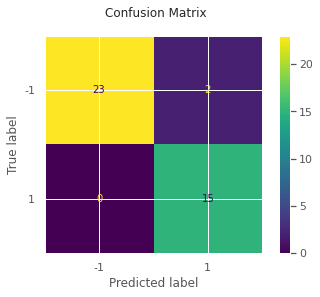

In [ ]:
for model in models:
  training(model)

#### tuning hyperparameters

In [ ]:
def tuning(model,param_grid, X=X_train, y=y_train):
  # define the model with default hyperparameters
  print('hyperparameters of model :',list(model.get_params().keys()))

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)  #evaluation procedure
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy') #search procedure
  grid_result = grid_search.fit(X, y)

  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  
  return grid_result.best_estimator_


##### knn

hyperparameters of model : ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
Best: 0.929167 using {'n_neighbors': 5}
Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

          -1       0.96      0.92      0.94        25
           1       0.88      0.93      0.90        15

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40




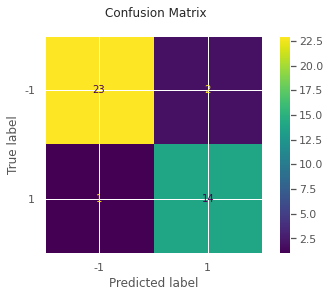

In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [2,3,4, 5, 7, 10, 20, 50]
}
best_knn = tuning(knn,param_grid)
training(best_knn)

##### Decision Tree

hyperparameters of model : ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']
Best: 0.918750 using {'max_depth': 11}
Classification report for classifier DecisionTreeClassifier(max_depth=11):
              precision    recall  f1-score   support

          -1       0.96      0.92      0.94        25
           1       0.88      0.93      0.90        15

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40




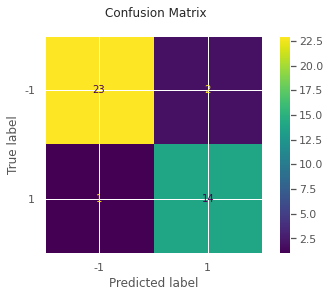

In [ ]:
DTree = DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(20))
}
best_DTree = tuning(DTree,param_grid)
training(best_DTree)

# Multi-Class Clssification

In [112]:
def evaluation(predicted,y_test=y_test):
  print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test.argmax(axis=1), predicted.argmax(axis=1))}\n"
    )
  disp = metrics.ConfusionMatrixDisplay.from_predictions(
      y_test.argmax(axis=1), predicted.argmax(axis=1))
  disp.figure_.suptitle("Confusion Matrix")
  # print(f"Confusion matrix:\n{disp.confusion_matrix}")
  plt.show()
  print('\n\n\n')
  # .values.argmax(axis=1)

## DATA

### Load and show some of data points

In [38]:
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [39]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
print(X.shape, y.shape)

(70000, 784) (70000,)


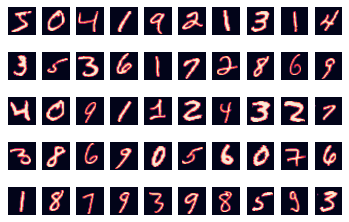

In [40]:
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X[digit_num].reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50) 

### One Hot encoding

In [41]:
# num_classes = len(np.unique(y))
# y1 = keras.utils.to_categorical(y, num_classes)


# #change data type from int to float
# X1 = X.astype('float32')



In [72]:
from sklearn.preprocessing import OneHotEncoder
y=y[...,np.newaxis]
y = OneHotEncoder().fit_transform(y).toarray()
X = X.astype('float32')
y = y.astype('float32')
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### split data into training and test sets

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43, shuffle=True)

print('shape X_train:', X_train.shape)
print('shape X_test:', X_test.shape)
print()
print('shape y_test:', y_test.shape)
print('shape y_train:', y_train.shape)

shape X_train: (56000, 784)
shape X_test: (14000, 784)

shape y_test: (14000, 10)
shape y_train: (56000, 10)


### Normalization/Stadardization

In [74]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
# X_valid = min_max_scaler.fit_transform(X_valid)
X_test = min_max_scaler.fit_transform(X_test)

## Models

### Classic Models

In [ ]:
# ! pip install catboost
! pip install xgboost
! pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
models = [
    LogisticRegression(multi_class='ovr'),
    LogisticRegression(multi_class='multinomial'),


    KNeighborsClassifier(n_neighbors=3),

    DecisionTreeClassifier(random_state=0, max_depth=20),
    RandomForestClassifier(max_depth=5, random_state=0),

    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=5),n_estimators=100
        ),

    xgb.XGBClassifier(
        tree_method = 'gpu_hist',
        n_jobs=-1,
        n_estimators=1000,
        max_depth=16,
        colsample_bytree=0.8, 
        subsample=0.8, 
        learning_rate=0.2,
        min_child_weight=6
    ),
    # svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf', gamma=1),
    svm.SVC(kernel='rbf', gamma=0.5, C=0.1)

]

Classification report for classifier LogisticRegression(multi_class='ovr'):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1366
           1       0.95      0.97      0.96      1531
           2       0.92      0.90      0.91      1422
           3       0.89      0.90      0.89      1402
           4       0.93      0.92      0.93      1353
           5       0.90      0.85      0.87      1297
           6       0.95      0.95      0.95      1426
           7       0.94      0.92      0.93      1474
           8       0.84      0.87      0.85      1355
           9       0.88      0.88      0.88      1374

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000




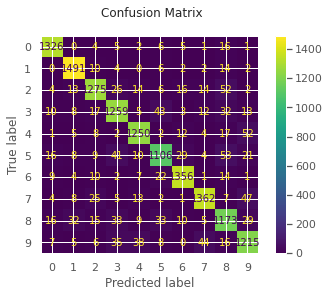





Classification report for classifier LogisticRegression(multi_class='multinomial'):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1366
           1       0.95      0.97      0.96      1531
           2       0.92      0.90      0.91      1422
           3       0.89      0.91      0.90      1402
           4       0.93      0.93      0.93      1353
           5       0.90      0.86      0.88      1297
           6       0.95      0.95      0.95      1426
           7       0.94      0.93      0.93      1474
           8       0.88      0.88      0.88      1355
           9       0.89      0.90      0.90      1374

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000




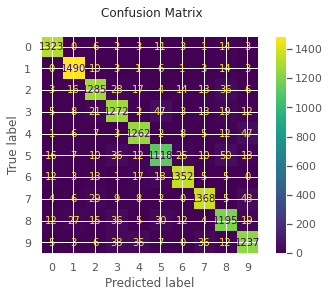





Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1366
           1       0.97      1.00      0.98      1531
           2       0.98      0.97      0.98      1422
           3       0.96      0.97      0.97      1402
           4       0.98      0.97      0.98      1353
           5       0.97      0.96      0.97      1297
           6       0.98      0.99      0.98      1426
           7       0.96      0.98      0.97      1474
           8       0.98      0.94      0.96      1355
           9       0.96      0.96      0.96      1374

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000




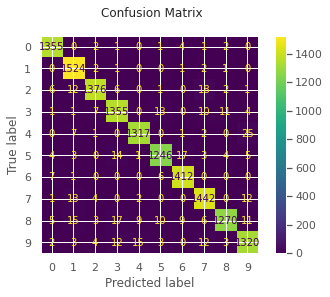





Classification report for classifier DecisionTreeClassifier(max_depth=3, random_state=0):
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1366
           1       0.71      0.85      0.77      1531
           2       0.00      0.00      0.00      1422
           3       0.61      0.62      0.62      1402
           4       0.26      0.74      0.39      1353
           5       0.35      0.27      0.31      1297
           6       0.33      0.66      0.44      1426
           7       0.41      0.24      0.30      1474
           8       0.42      0.21      0.28      1355
           9       0.00      0.00      0.00      1374

    accuracy                           0.45     14000
   macro avg       0.38      0.44      0.39     14000
weighted avg       0.39      0.45      0.39     14000




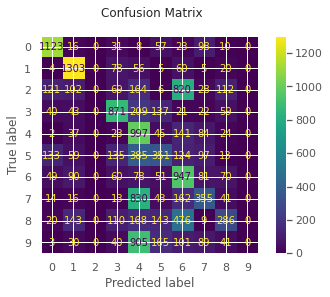





Classification report for classifier RandomForestClassifier(max_depth=3, random_state=0):
              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1366
           1       0.63      0.98      0.77      1531
           2       0.82      0.68      0.74      1422
           3       0.67      0.75      0.71      1402
           4       0.85      0.77      0.81      1353
           5       0.96      0.24      0.38      1297
           6       0.83      0.81      0.82      1426
           7       0.73      0.85      0.79      1474
           8       0.81      0.61      0.70      1355
           9       0.67      0.73      0.70      1374

    accuracy                           0.74     14000
   macro avg       0.77      0.74      0.73     14000
weighted avg       0.77      0.74      0.73     14000




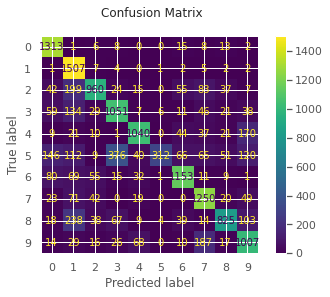





Classification report for classifier AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1366
           1       0.82      0.96      0.89      1531
           2       0.71      0.51      0.60      1422
           3       0.71      0.69      0.70      1402
           4       0.74      0.75      0.74      1353
           5       0.75      0.60      0.67      1297
           6       0.64      0.88      0.74      1426
           7       0.81      0.77      0.79      1474
           8       0.70      0.68      0.69      1355
           9       0.64      0.61      0.63      1374

    accuracy                           0.74     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.74      0.73     14000




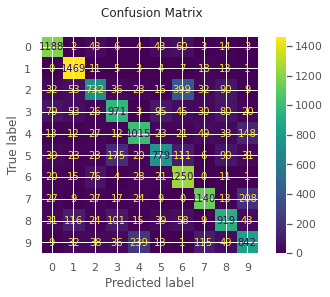





Classification report for classifier XGBClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=16,
              min_child_weight=6, n_estimators=1000, n_jobs=-1,
              objective='multi:softprob', subsample=0.8,
              tree_method='gpu_hist'):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1366
           1       0.99      0.99      0.99      1531
           2       0.98      0.98      0.98      1422
           3       0.98      0.97      0.97      1402
           4       0.98      0.98      0.98      1353
           5       0.97      0.96      0.97      1297
           6       0.98      0.98      0.98      1426
           7       0.97      0.98      0.98      1474
           8       0.97      0.97      0.97      1355
           9       0.96      0.96      0.96      1374

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98   

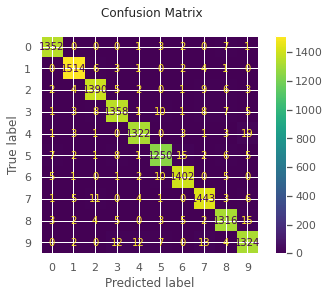

In [ ]:
for model in models:
  training(model)

#### LightGBM


In [ ]:
# from typing import Generator
# train_size = 0.7
# validation_size = 0.2
# test_size = 0.1

# # train dataset
# train_gf= gf.sample(frac=train_size,random_state=200) #random state is a seed value
# temp= gf.drop(train_gf.index)
# # validation dataset
# val_gf = temp.sample(frac=validation_size/(1-train_size),random_state=201)
# # test dataset
# test_gf = temp.drop(val_gf.index)


# print("train size: ", len(train_gf))
# print("valid size: ", len(val_gf))
# print("test size : ", len(test_gf))

# target = 'Sale'
# predictors = list(gf.columns)
# predictors.remove('Sale')
# categorical = list(gf.select_dtypes('object').columns)

In [ ]:
# import lightgbm as lgb

# def lgb_modelfit_nocv(params, dtrain, dvalid, predictors, target='target', objective='binary', metrics='auc',
#                  feval=None, early_stopping_rounds=20, num_boost_round=3000, verbose_eval=10, categorical_features=None):
#     lgb_params = {
#         'boosting_type': 'gbdt',
#         'objective': objective,
#         'metric':metrics,
#         'learning_rate': 0.01,
#         'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
#         'max_depth': -1,  # -1 means no limit
#         'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
#         'max_bin': 255,  # Number of bucketed bin for feature values
#         'subsample': 0.6,  # Subsample ratio of the training instance.
#         'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
#         'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
#         'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
#         'subsample_for_bin': 200000,  # Number of samples for constructing bin
#         'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
#         'reg_alpha': 0,  # L1 regularization term on weights
#         'reg_lambda': 0,  # L2 regularization term on weights
#         'nthread': 8,
#         'verbose': 0,
#         'metric':metrics
#     }

#     lgb_params.update(params)

#     print("preparing validation datasets")

#     xgtrain = lgb.Dataset(dtrain[predictors].values, label=dtrain[target].values,
#                           feature_name=predictors,
#                           categorical_feature=categorical_features
#                           )
#     xgvalid = lgb.Dataset(dvalid[predictors].values, label=dvalid[target].values,
#                           feature_name=predictors,
#                           categorical_feature=categorical_features
#                           )
    
#     evals_results = {}

#     bst1 = lgb.train(lgb_params, 
#                      xgtrain, 
#                      valid_sets=[xgtrain, xgvalid], 
#                      valid_names=['train','valid'], 
#                      evals_result=evals_results, 
#                      num_boost_round=num_boost_round,
#                      early_stopping_rounds=early_stopping_rounds,
#                      verbose_eval=10, 
#                      feval=feval)

#     n_estimators = bst1.best_iteration
#     print("\nModel Report")
#     print("n_estimators : ", n_estimators)
#     print(metrics+":", evals_results['valid'][metrics][n_estimators-1])

#     return bst1

In [ ]:
# print("Training...")
# params = {
#     'learning_rate': 0.1,
#     'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
#     'max_depth': 3,  # -1 means no limit
#     'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
#     'max_bin': 100,  # Number of bucketed bin for feature values
#     'subsample': 0.7,  # Subsample ratio of the training instance.
#     'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
#     'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
#     'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
#     'scale_pos_weight':99 # because training data is extremely unbalanced 
# }
# bst = lgb_modelfit_nocv(params, 
#                         # train_gf,
#                         # val_gf,
#                         # predictors, 
#                         # target, 
#                         # objective='binary', 
#                         metrics='auc',
#                         # early_stopping_rounds=100, 
#                         # verbose_eval=True, 
#                         num_boost_round=300, 
#                         # categorical_features=categorical
#                         )

Training...
preparing validation datasets

Model Report
n_estimators :  0


In [ ]:
# # make predictions for test data
# y_pred = bst.predict(test_gf[predictors])
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(test_gf['Sale'].values, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print('\n\n\n')

NameError: ignored

In [ ]:
import numpy as np 
import lightgbm as lgb

data = X_train
label = y_train
train_data = lgb.Dataset(data, label=label, free_raw_data=False)
params = {
    'learning_rate': 0.01,
    'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
    'max_depth': 50,  # -1 means no limit
    'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
    'max_bin': 225,  # Number of bucketed bin for feature values
    'subsample': 0.7,  # Subsample ratio of the training instance.
    'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
    'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
    'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
    'scale_pos_weight':99, # because training data is extremely unbalanced 
    'boosting_type': 'gbdt',
         'metrics' : 'auc',
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 8,
        'verbose': 0,
}
gbm_2 = lgb.train(params, train_data, num_boost_round = 300,verbose_eval=10,early_stopping_rounds=100
                init_model = gbm_init)
print("Option 2 current iter# %d" %gbm_2.current_iteration())

Option 2 current iter# 20


In [ ]:
y_pred = bst.predict(X_test)
predictions = [round(value) for value in y_pred]
r = metrics.classification_report(y_test,predictions)
print(r)

#### tuning hyperparameters

##### knn

hyperparameters of model : ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
Best: 0.929167 using {'n_neighbors': 5}
Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1366
           1       0.96      1.00      0.98      1531
           2       0.99      0.96      0.97      1422
           3       0.96      0.97      0.96      1402
           4       0.98      0.97      0.98      1353
           5       0.97      0.96      0.96      1297
           6       0.98      0.99      0.98      1426
           7       0.96      0.97      0.97      1474
           8       0.99      0.93      0.96      1355
           9       0.95      0.96      0.96      1374

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000




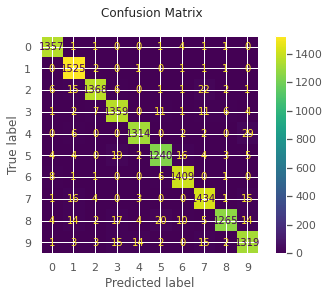

In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [2,3,4, 5, 7, 10, 20, 50]
}
best_knn = tuning(knn,param_grid)
training(best_knn)

##### AdaBoost

hyperparameters of model : ['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state']
Best: 0.945833 using {'base_estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 1.0, 'n_estimators': 10}
Classification report for classifier AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=10):
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1366
           1       0.94      0.93      0.93      1531
           2       0.77      0.80      0.78      1422
           3       0.77      0.76      0.77      1402
           4       0.81      0.78      0.79      1353
           5       0.73      0.80      0.76      1297
           6       0.92      0.81      0.86      1426
           7       0.88      0.87      0.87      1474
           8       0.75      0.79      0.77      1355
           9       0.71      0.80      0.75      1374

    accuracy                    

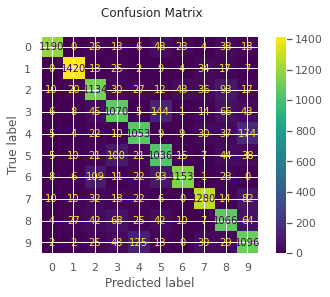

In [ ]:
adaboost = AdaBoostClassifier()
  # define the grid of hyperparameters to search
param_grid = {
    'n_estimators' : [10, 50, 100, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
    'base_estimator' : [DecisionTreeClassifier(max_depth=i) for i in range(5,100,5)]
}
best_adaboost = tuning(adaboost,param_grid)
training(best_adaboost)

### Deep Models

#### MLP

##### Scikit-Learn

In [81]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(128, 64,32),max_iter=2000)
model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128, 64, 32), max_iter=2000,
              solver='lbfgs')

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128, 64, 32), max_iter=2000,
              solver='lbfgs'):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1366
           1       0.99      0.99      0.99      1531
           2       0.97      0.98      0.98      1422
           3       0.98      0.97      0.97      1402
           4       0.98      0.98      0.98      1353
           5       0.97      0.96      0.96      1297
           6       0.98      0.98      0.98      1426
           7       0.98      0.98      0.98      1474
           8       0.97      0.96      0.97      1355
           9       0.96      0.96      0.96      1374

   micro avg       0.98      0.97      0.98     14000
   macro avg       0.98      0.97      0.98     14000
weighted avg       0.98      0.97      0.98     14000
 samples avg       0.97      0.97      0.97     14000




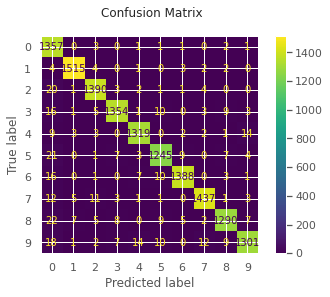

In [91]:
predicted = model.predict(X_test)
evaluation(predicted,y_test=y_test)

##### TensorFlow(Keras)
4-layer feedforward network

In [92]:
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks
import keras
import tensorflow as tf

In [100]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [101]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,          # minimium amount of change to be considered an improvement
    patience=20,              # number of epochs to wait before deciding there is no significant improvement in training
    restore_best_weights=True,
)

In [102]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
    )

In [103]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    epochs = 5, 
                    validation_split=0.2,
                    callbacks=[early_stopping]
                    )

Epoch 1/5
2800/2800 [==============================] - 12s 4ms/step - loss: 0.3529 - precision_3: 0.9327 - recall_3: 0.8785 - val_loss: 0.2851 - val_precision_3: 0.9461 - val_recall_3: 0.9032
Epoch 2/5
2800/2800 [==============================] - 11s 4ms/step - loss: 0.2288 - precision_3: 0.9596 - recall_3: 0.9258 - val_loss: 0.2725 - val_precision_3: 0.9564 - val_recall_3: 0.9157
Epoch 3/5
2800/2800 [==============================] - 12s 4ms/step - loss: 0.2096 - precision_3: 0.9656 - recall_3: 0.9338 - val_loss: 0.2326 - val_precision_3: 0.9585 - val_recall_3: 0.9283
Epoch 4/5
2800/2800 [==============================] - 12s 4ms/step - loss: 0.1874 - precision_3: 0.9706 - recall_3: 0.9444 - val_loss: 0.2251 - val_precision_3: 0.9675 - val_recall_3: 0.9346
Epoch 5/5
2800/2800 [==============================] - 12s 4ms/step - loss: 0.1728 - precision_3: 0.9746 - recall_3: 0.9486 - val_loss: 0.3104 - val_precision_3: 0.9574 - val_recall_3: 0.9295


438/438 [==============================] - 1s 2ms/step
Classification report for classifier <keras.engine.sequential.Sequential object at 0x7f143f38b790>:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1366
           1       0.99      0.97      0.98      1531
           2       0.92      0.97      0.94      1422
           3       0.83      0.97      0.90      1402
           4       0.96      0.95      0.96      1353
           5       0.92      0.90      0.91      1297
           6       0.96      0.97      0.97      1426
           7       0.99      0.91      0.95      1474
           8       0.93      0.80      0.86      1355
           9       0.90      0.94      0.92      1374

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000




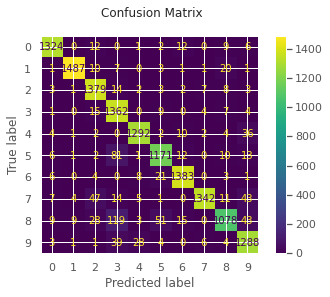

In [113]:
predicted = model.predict(X_test)
evaluation(predicted,y_test=y_test)

##### PyTorch
4-layer feedforward network

In [114]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor

In [116]:
# transform to torch tensor
tensor_X_train = Tensor(X_train.astype(np.float32))
tensor_y_train = Tensor(y_train.astype(np.float32))
tensor_X_test = Tensor(X_test.astype(np.float32))
tensor_y_test = Tensor(y_test.astype(np.float32))

# create the datset
train_set = TensorDataset(tensor_X_train,tensor_y_train)       
test_set = TensorDataset(tensor_X_test,tensor_y_test)       


# create your dataloader
train_dl = DataLoader(train_set,batch_size=32, shuffle=True)
test_dl = DataLoader(test_set,batch_size=32, shuffle=True)


In [118]:
layers = []
layers.append(nn.Linear(X_train.shape[1], 128))
layers.append(nn.ReLU())

layers.append(nn.Linear(128, 64))
layers.append(nn.ReLU())

layers.append(nn.Linear(64, 32))
layers.append(nn.ReLU())

layers.append(nn.Linear(32, 10))
layers.append(nn.Softmax())

model = nn.Sequential(*layers)

In [121]:
# define the optimization
from torch.nn import CrossEntropyLoss
from torch.optim import Adam

criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.0001)

In [126]:
# loop over the dataset multiple times
for epoch in range(5):  

    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_dl):
        
        # clear the gradients
        optimizer.zero_grad()
        # compute the model output
        yhat = model(inputs)
        
        # calculate loss
        loss = criterion(yhat, targets)
        
        # credit assignment
        loss.backward()
        # update model weights
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if not i % 5000:    # print every 2000 mini-batches
            print('[%d, %5d] F1 Score is: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,     1] F1 Score is: 0.001
[2,     1] F1 Score is: 0.001
[3,     1] F1 Score is: 0.001
[4,     1] F1 Score is: 0.001
[5,     1] F1 Score is: 0.001


In [129]:
from sklearn.metrics import precision_recall_fscore_support
precision = 0
recall = 0
total_itr = 0
for i, (inputs, targets) in enumerate(test_dl):
    # evaluate the model on the test set
    yhat = model(inputs)
    pr,rc,f1,_ = precision_recall_fscore_support(yhat.detach().numpy()>0.4, targets.detach().numpy(), average='macro')
    precision += pr
    recall += rc
    total_itr += 1

precision /= total_itr
recall /= total_itr

print('Macro F1-score is %.2f' %(2*precision*recall/(precision+recall)))

Macro F1-score is 0.77


#### non-sequential feedforward network

##### TensorFlow(Keras)

In [135]:
from keras.layers import Add, Concatenate, Input
from keras.models import Model

input_layer = Input(shape=(X_train.shape[1],))

# Pass the output of the input layer into a hidden layer
hidden_layer_1 = Dense(20,activation='relu')(input_layer)

# The second hidden layer receives input from the input_layer and not the last hidden layer
hidden_layer_2 = Dense(10,activation='tanh')(input_layer)

# The second hidden layer receives input from the input_layer and not the last hidden layer
hidden_layer_3 = Dense(10,activation='tanh')(hidden_layer_1)


#added = tf.keras.layers.Add()([hidden_layer_1, hidden_layer_2])
#add_layer = Add()([hidden_layer_2,hidden_layer_1])

add_layer = Concatenate()([hidden_layer_3, hidden_layer_2])

output_layer = Dense(10,activation='softmax')(add_layer)

# Defined an actual model out of the above with an output being the same shape as the above layer and input being the size as the input layer
model = Model(inputs=input_layer, outputs=output_layer)

In [136]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
    )
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_20 (Dense)               (None, 20)           15700       ['input_2[0][0]']                
                                                                                                  
 dense_22 (Dense)               (None, 10)           210         ['dense_20[0][0]']               
                                                                                                  
 dense_21 (Dense)               (None, 10)           7850        ['input_2[0][0]']                
                                                                                            

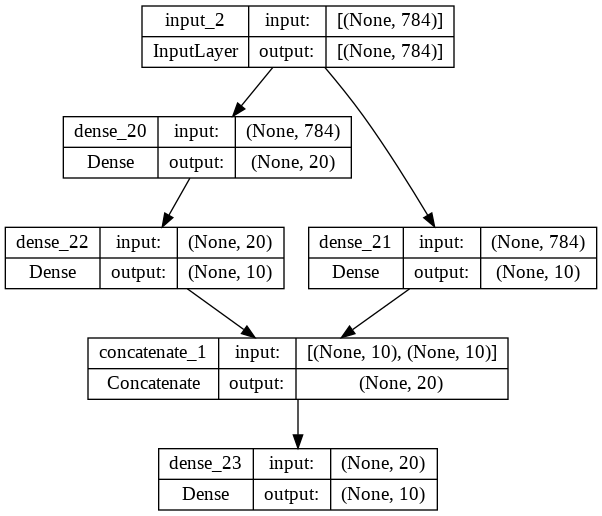

In [137]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)


In [138]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    epochs = 5, 
                    validation_split=0.2,
                    callbacks=[early_stopping]
                    )

Epoch 1/5
2800/2800 [==============================] - 12s 4ms/step - loss: 0.3685 - precision_5: 0.9476 - recall_5: 0.8435 - val_loss: 0.2170 - val_precision_5: 0.9516 - val_recall_5: 0.9226
Epoch 2/5
2800/2800 [==============================] - 12s 4ms/step - loss: 0.1811 - precision_5: 0.9591 - recall_5: 0.9370 - val_loss: 0.1687 - val_precision_5: 0.9604 - val_recall_5: 0.9407
Epoch 3/5
2800/2800 [==============================] - 13s 5ms/step - loss: 0.1425 - precision_5: 0.9668 - recall_5: 0.9513 - val_loss: 0.1527 - val_precision_5: 0.9609 - val_recall_5: 0.9462
Epoch 4/5
2800/2800 [==============================] - 14s 5ms/step - loss: 0.1221 - precision_5: 0.9715 - recall_5: 0.9581 - val_loss: 0.1485 - val_precision_5: 0.9619 - val_recall_5: 0.9501
Epoch 5/5
2800/2800 [==============================] - 12s 4ms/step - loss: 0.1077 - precision_5: 0.9740 - recall_5: 0.9632 - val_loss: 0.1441 - val_precision_5: 0.9624 - val_recall_5: 0.9515


438/438 [==============================] - 1s 1ms/step
Classification report for classifier <keras.engine.functional.Functional object at 0x7f143f625e50>:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1366
           1       0.98      0.98      0.98      1531
           2       0.95      0.97      0.96      1422
           3       0.97      0.93      0.95      1402
           4       0.93      0.97      0.95      1353
           5       0.96      0.93      0.95      1297
           6       0.97      0.97      0.97      1426
           7       0.96      0.97      0.96      1474
           8       0.93      0.95      0.94      1355
           9       0.96      0.92      0.94      1374

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000




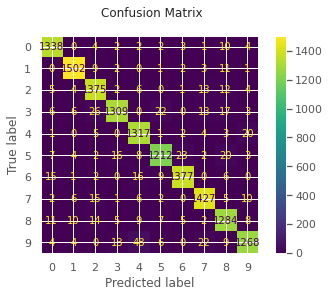

In [139]:
predicted = model.predict(X_test)
evaluation(predicted,y_test=y_test)